In [65]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import re

## データセットを辞書化

この際、MoleculeNetのデータではindex_col=0により一列目のcolumnsが下に一段下がってしまう \
（csvファイルを覗いてみて、一行目最初が","でないときはindex_col=0不要！！！）

In [82]:
moleculenet_d = sorted(os.listdir(Path.cwd()/"MoleculeNet"))
moleculenet = {}
for d in moleculenet_d:
    name = d.replace(".csv", "")
    moleculenet[name] = pd.read_csv(Path.cwd()/"MoleculeNet"/d)

In [83]:
TDC_CYP_d = sorted(os.listdir(Path.cwd()/"TDC"/"CYP"))
TDC_CYP = {}
for d in TDC_CYP_d:
    name = d.replace(".csv", "")
    TDC_CYP[name] = pd.read_csv(Path.cwd()/"TDC"/"CYP"/d)

In [84]:
TDC_Tox_d = sorted(os.listdir(Path.cwd()/"TDC"/"Tox"))
TDC_Tox = {}
for d in TDC_Tox_d:
    name = d.replace(".csv", "")
    TDC_Tox[name] = pd.read_csv(Path.cwd()/"TDC"/"Tox"/d)

In [85]:
ALL_DATA = {**moleculenet, **TDC_Tox, **TDC_CYP}

In [86]:
print(ALL_DATA.keys())

dict_keys(['bace', 'clintox_m', 'muv', 'sider', 'tox21_m', 'toxcast_m', 'ames', 'carcinogens_lagunin', 'clintox_t', 'dili', 'herg', 'herg_central', 'herg_karim', 'ld50_zhu', 'skin_reaction', 'tox21_t', 'toxcast_t', 'cyp1a2_veith', 'cyp2c19_veith', 'cyp2c9_substrate_carbonmangels', 'cyp2c9_veith', 'cyp2d6_substrate_carbonmangels', 'cyp2d6_veith', 'cyp3a4_substrate_carbonmangels', 'cyp3a4_veith'])


## データまとめ

In [113]:
info = pd.DataFrame(columns=("chemicals", "not_objects", "objects", "isnull_prop_max", "isnull_prop_min", "isnull_prop_mean"))

for key in ALL_DATA.keys():
    # 特徴量かどうか判定
    not_objects = []
    objects = []
    chemicals = ALL_DATA[key].shape[0]
    for c in ALL_DATA[key].columns:
        cnt = 0
        for v in ALL_DATA[key][c]:
            if isinstance(v, str):
                not_objects.append(c)
                break
            elif v == 1 or v == 0:
                cnt += 1
            elif isinstance(v, float):
                if v >= 10000: # ID系列を完全に弾く
                    not_objects.append(c)
                else:
                    objects.append(c)
                break
            if cnt == 5:
                objects.append(c)
                break
    not_objects_num = len(not_objects)
    objects_num = len(objects)
    # 欠損値カウント
    isnull_prop = []
    for f in objects:
        isnull_prop.append(ALL_DATA[key][f].isnull().sum()/chemicals)
    isnull_prop_max = max(isnull_prop)
    isnull_prop_min = min(isnull_prop)
    isnull_prop_mean = np.mean(isnull_prop)
    info.loc[key] = [chemicals, not_objects_num, objects_num, isnull_prop_max, isnull_prop_min, isnull_prop_mean]

In [114]:
display(info)

chemicals  not_objects  objects  \
bace                               1513.0          5.0    570.0   
clintox_m                          1484.0          1.0      2.0   
muv                               93087.0          2.0     17.0   
sider                              1427.0          1.0     27.0   
tox21_m                            7831.0          2.0     12.0   
toxcast_m                          8597.0          1.0    617.0   
ames                               7278.0          2.0      1.0   
carcinogens_lagunin                 280.0          2.0      1.0   
clintox_t                          1478.0          2.0      1.0   
dili                                475.0          1.0      2.0   
herg                                655.0          2.0      1.0   
herg_central                     306893.0          1.0      3.0   
herg_karim                        13445.0          1.0      1.0   
ld50_zhu                           7385.0          2.0      1.0   
skin_reaction                       404.0          2.0      1.0   
tox21_t                            7831.0          2.0     12.0   
toxcast_t                          8576.0          2.0    617.0   
cyp1a2_veith                      12579.0          2.0      1.0   
cyp2c19_veith                     12665.0          2.0      1.0   
cyp2c9_substrate_carbonmangels      669.0          2.0      1.0   
cyp2c9_veith                      12092.0          2.0      1.0   
cyp2d6_substrate_carbonmangels      667.0          2.0      1.0   
cyp2d6_veith                      13130.0          2.0      1.0   
cyp3a4_substrate_carbonmangels      670.0          2.0      1.0   
cyp3a4_veith                      12328.0          2.0      1.0   

                                isnull_prop_max  isnull_prop_min  \
bace                                   0.000000         0.000000   
clintox_m                              0.000000         0.000000   
muv                                    0.845188         0.839913   
sider                                  0.000000         0.000000   
tox21_m                                0.258077         0.072277   
toxcast_m                              0.994184         0.075259   
ames                                   0.000000         0.000000   
carcinogens_lagunin                    0.000000         0.000000   
clintox_t                              0.000000         0.000000   
dili                                   0.000000         0.000000   
herg                                   0.000000         0.000000   
herg_central                           0.000000         0.000000   
herg_karim                             0.000000         0.000000   
ld50_zhu                               0.000000         0.000000   
skin_reaction                          0.000000         0.000000   
tox21_t                                0.258077         0.072277   
toxcast_t                              0.994170         0.075210   
cyp1a2_veith                           0.000000         0.000000   
cyp2c19_veith                          0.000000         0.000000   
cyp2c9_substrate_carbonmangels         0.000000         0.000000   
cyp2c9_veith                           0.000000         0.000000   
cyp2d6_substrate_carbonmangels         0.000000         0.000000   
cyp2d6_veith                           0.000000         0.000000   
cyp3a4_substrate_carbonmangels         0.000000         0.000000   
cyp3a4_veith                           0.000000         0.000000   

                                isnull_prop_mean  
bace                                    0.000000  
clintox_m                               0.000000  
muv                                     0.842092  
sider                                   0.000000  
tox21_m                                 0.170540  
toxcast_m                               0.709975  
ames                                    0.000000  
carcinogens_lagunin                     0.000000  
clintox_t                               0.000000  
dili      

### baceの大量の記述子や、clintox_mのFDA_APPROVED、diliのIDなど例外がありすぎるので断念...
手動でまとめます

In [126]:
info.to_csv("info_semiaccurate.csv")

## 二値分類データセットのバランスとデータ量

BACE

In [223]:
df = ALL_DATA["bace"]["Class"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("bace:", pr)
print("chemicals (binary):", df.notnull().sum())
print("chemicals (reg):", ALL_DATA["bace"]["pIC50"].notnull().sum())

bace: 45.67085261070721
chemicals (binary): 1513
chemicals (reg): 1513


ClinTox (MoleculeNet)

In [178]:
df = ALL_DATA["clintox_m"]["CT_TOX"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("clintox_m:", pr)
print("chemicals:", df.notnull().sum())

clintox_m: 7.547169811320755
chemicals: 1484


MUV

objects: 17
max: 14902
min: 14411
mean 14699.176470588236


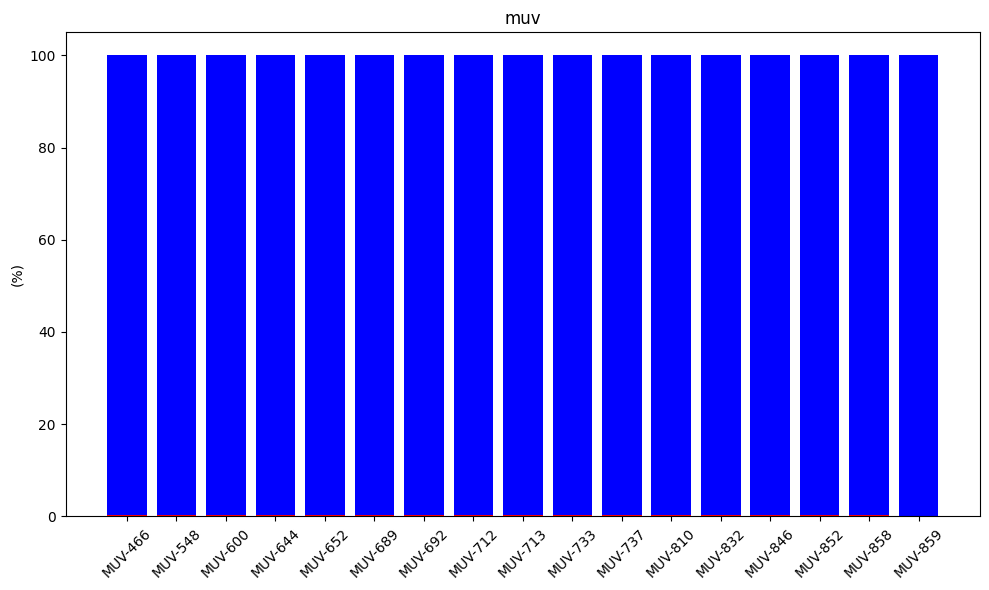

In [216]:
df = ALL_DATA["muv"]
features = []
prs = []
frs = []
chemicals = []
cnt = 0
for c in df.columns:
    if c == "mol_id" or c == "smiles":
        continue
    pr = df[c].value_counts()[1]*100 / df[c].notnull().sum()
    fr = df[c].value_counts()[0]*100 / df[c].notnull().sum()
    features.append(c)
    prs.append(pr)
    frs.append(fr)
    chemicals.append(df[c].notnull().sum())
    cnt += 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(features, prs, color="red")
ax.bar(features, frs, bottom=prs, color="blue")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
ax.set_ylabel("(%)")
ax.set_title("muv")
plt.tight_layout()

print("objects:", cnt)
print("max:", max(chemicals))
print("min:", min(chemicals))
print("mean", np.mean(chemicals))

SIDER

objects: 27
max: 1427
min: 1427
mean 1427.0


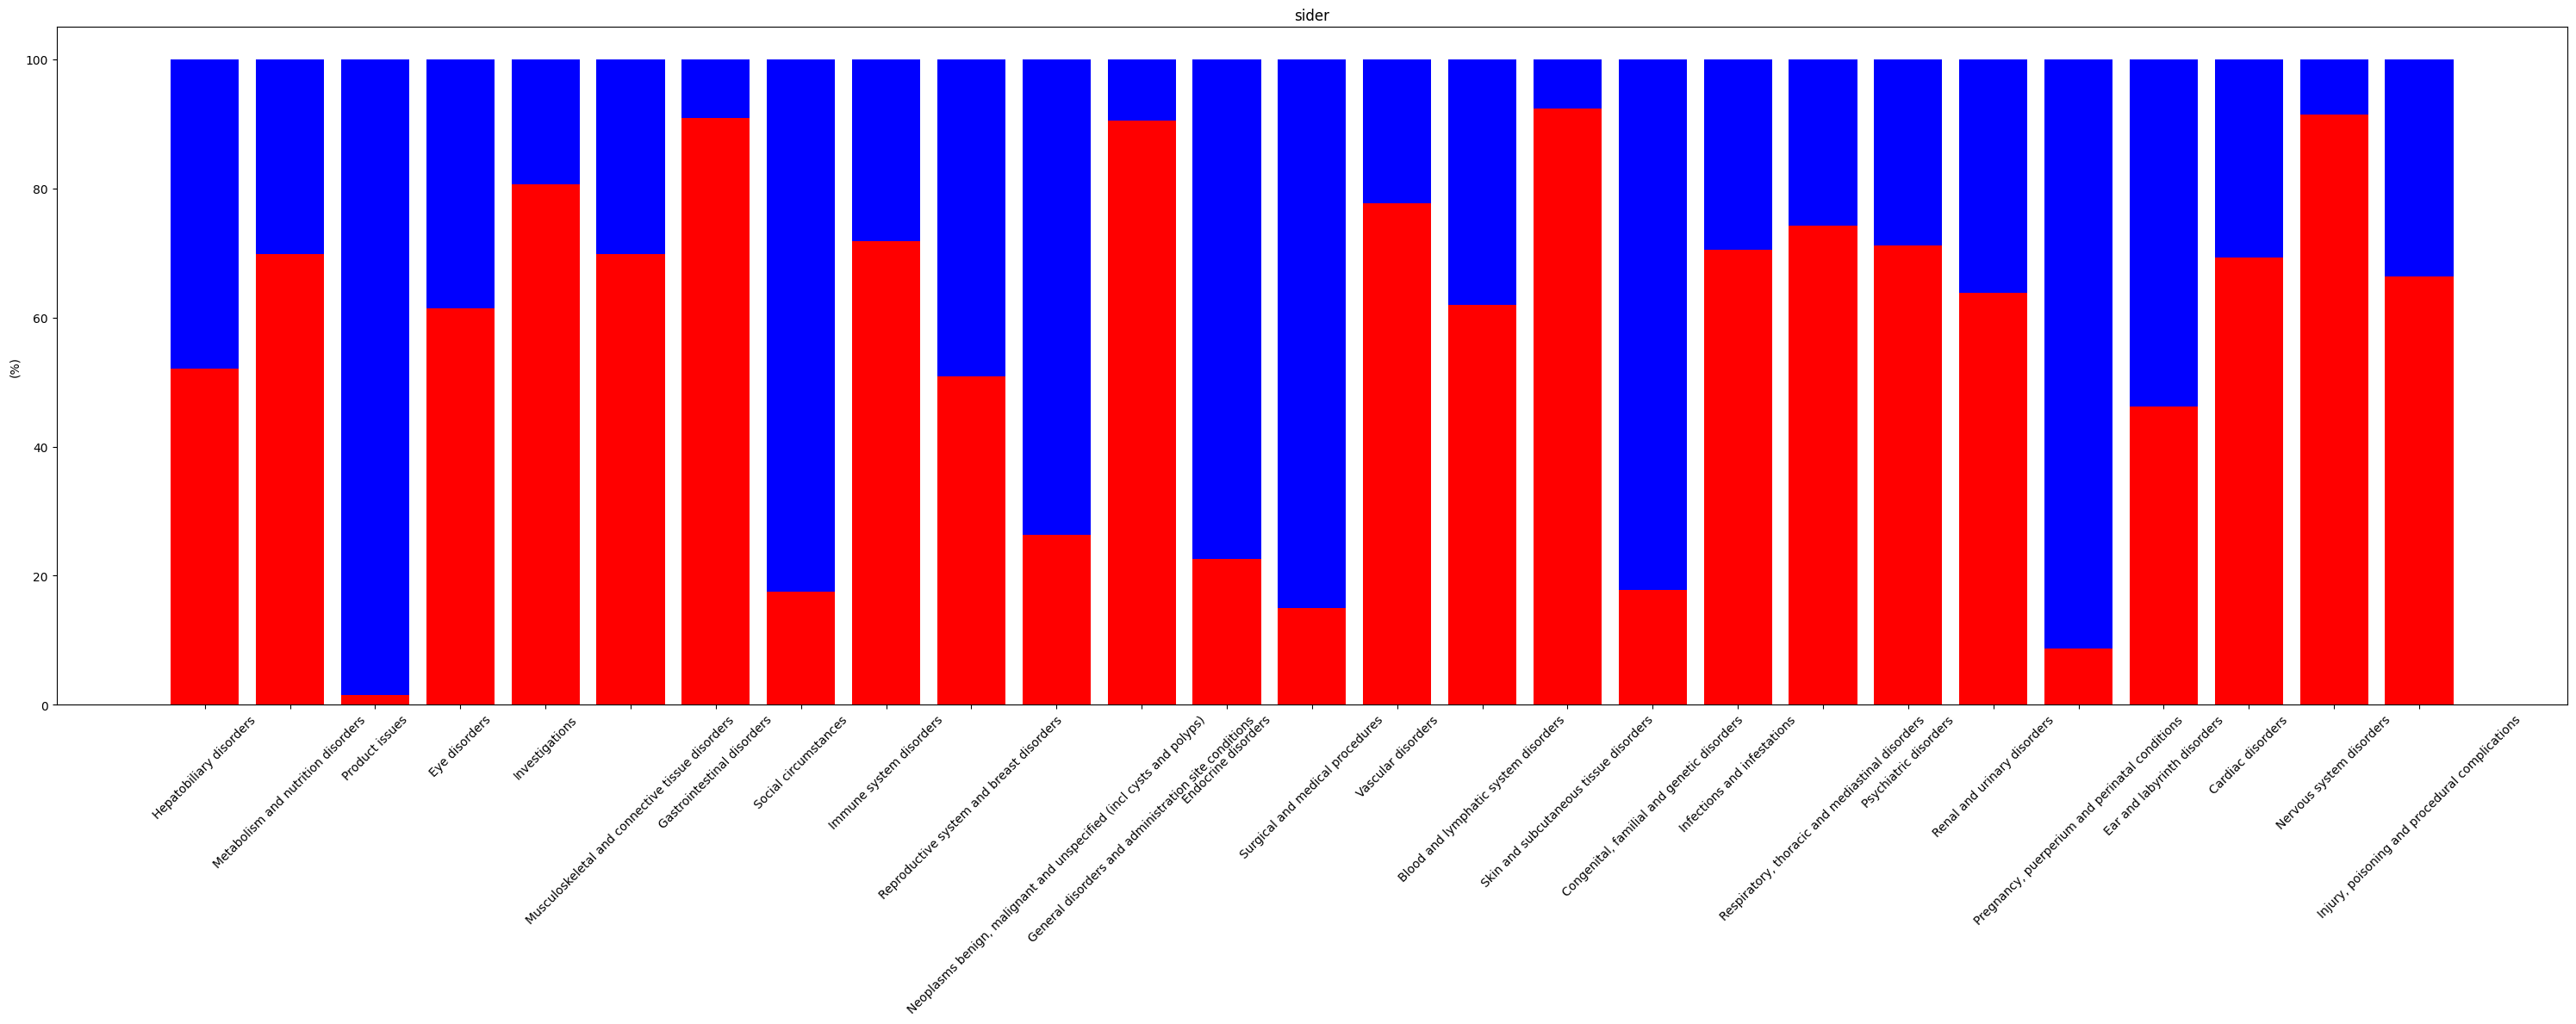

In [217]:
df = ALL_DATA["sider"]
features = []
prs = []
frs = []
chemicals = []
cnt = 0
for c in df.columns:
    if c == "smiles":
        continue
    pr = df[c].value_counts()[1]*100 / df[c].notnull().sum()
    fr = df[c].value_counts()[0]*100 / df[c].notnull().sum()
    features.append(c)
    prs.append(pr)
    frs.append(fr)
    chemicals.append(df[c].notnull().sum())
    cnt += 1
fig, ax = plt.subplots(figsize=(30, 12))
ax.bar(features, prs, color="red")
ax.bar(features, frs, bottom=prs, color="blue")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
ax.set_ylabel("(%)")
ax.set_title("sider")
plt.tight_layout()

print("objects:", cnt)
print("max:", max(chemicals))
print("min:", min(chemicals))
print("mean", np.mean(chemicals))

Tox21 (MoleculeNet)

objects: 12
max: 7265
min: 5810
mean 6495.5


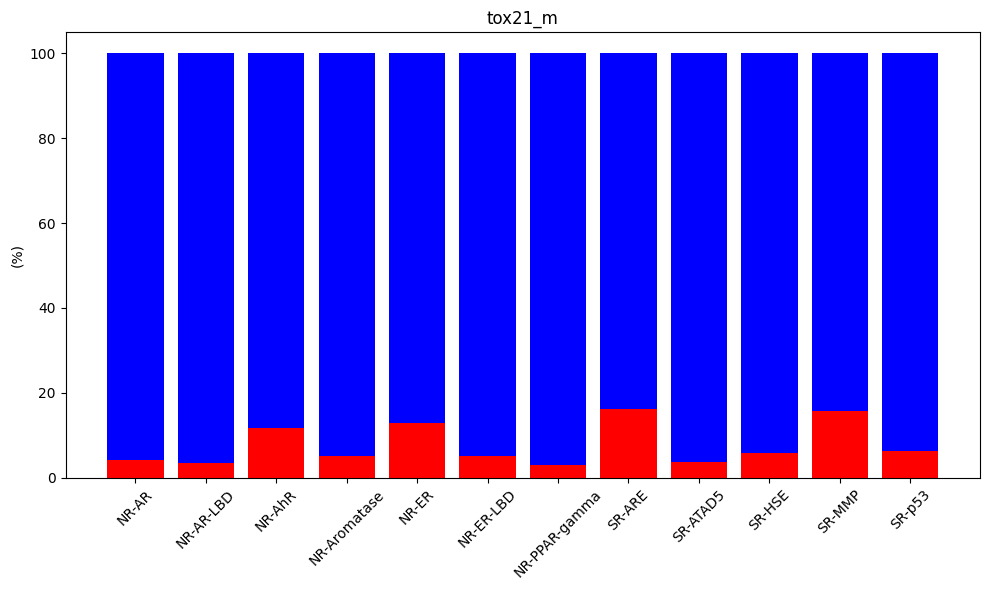

In [218]:
df = ALL_DATA["tox21_m"]
features = []
prs = []
frs = []
chemicals = []
cnt = 0
for c in df.columns:
    if c == "mol_id" or c == "smiles":
        continue
    pr = df[c].value_counts()[1]*100 / df[c].notnull().sum()
    fr = df[c].value_counts()[0]*100 / df[c].notnull().sum()
    features.append(c)
    prs.append(pr)
    frs.append(fr)
    chemicals.append(df[c].notnull().sum())
    cnt += 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(features, prs, color="red")
ax.bar(features, frs, bottom=prs, color="blue")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
ax.set_ylabel("(%)")
ax.set_title("tox21_m")
plt.tight_layout()

print("objects:", cnt)
print("max:", max(chemicals))
print("min:", min(chemicals))
print("mean", np.mean(chemicals))

ToxCast (MoleculeNet)

objects: 617
max: 7950
min: 50
mean 2493.3468395461914


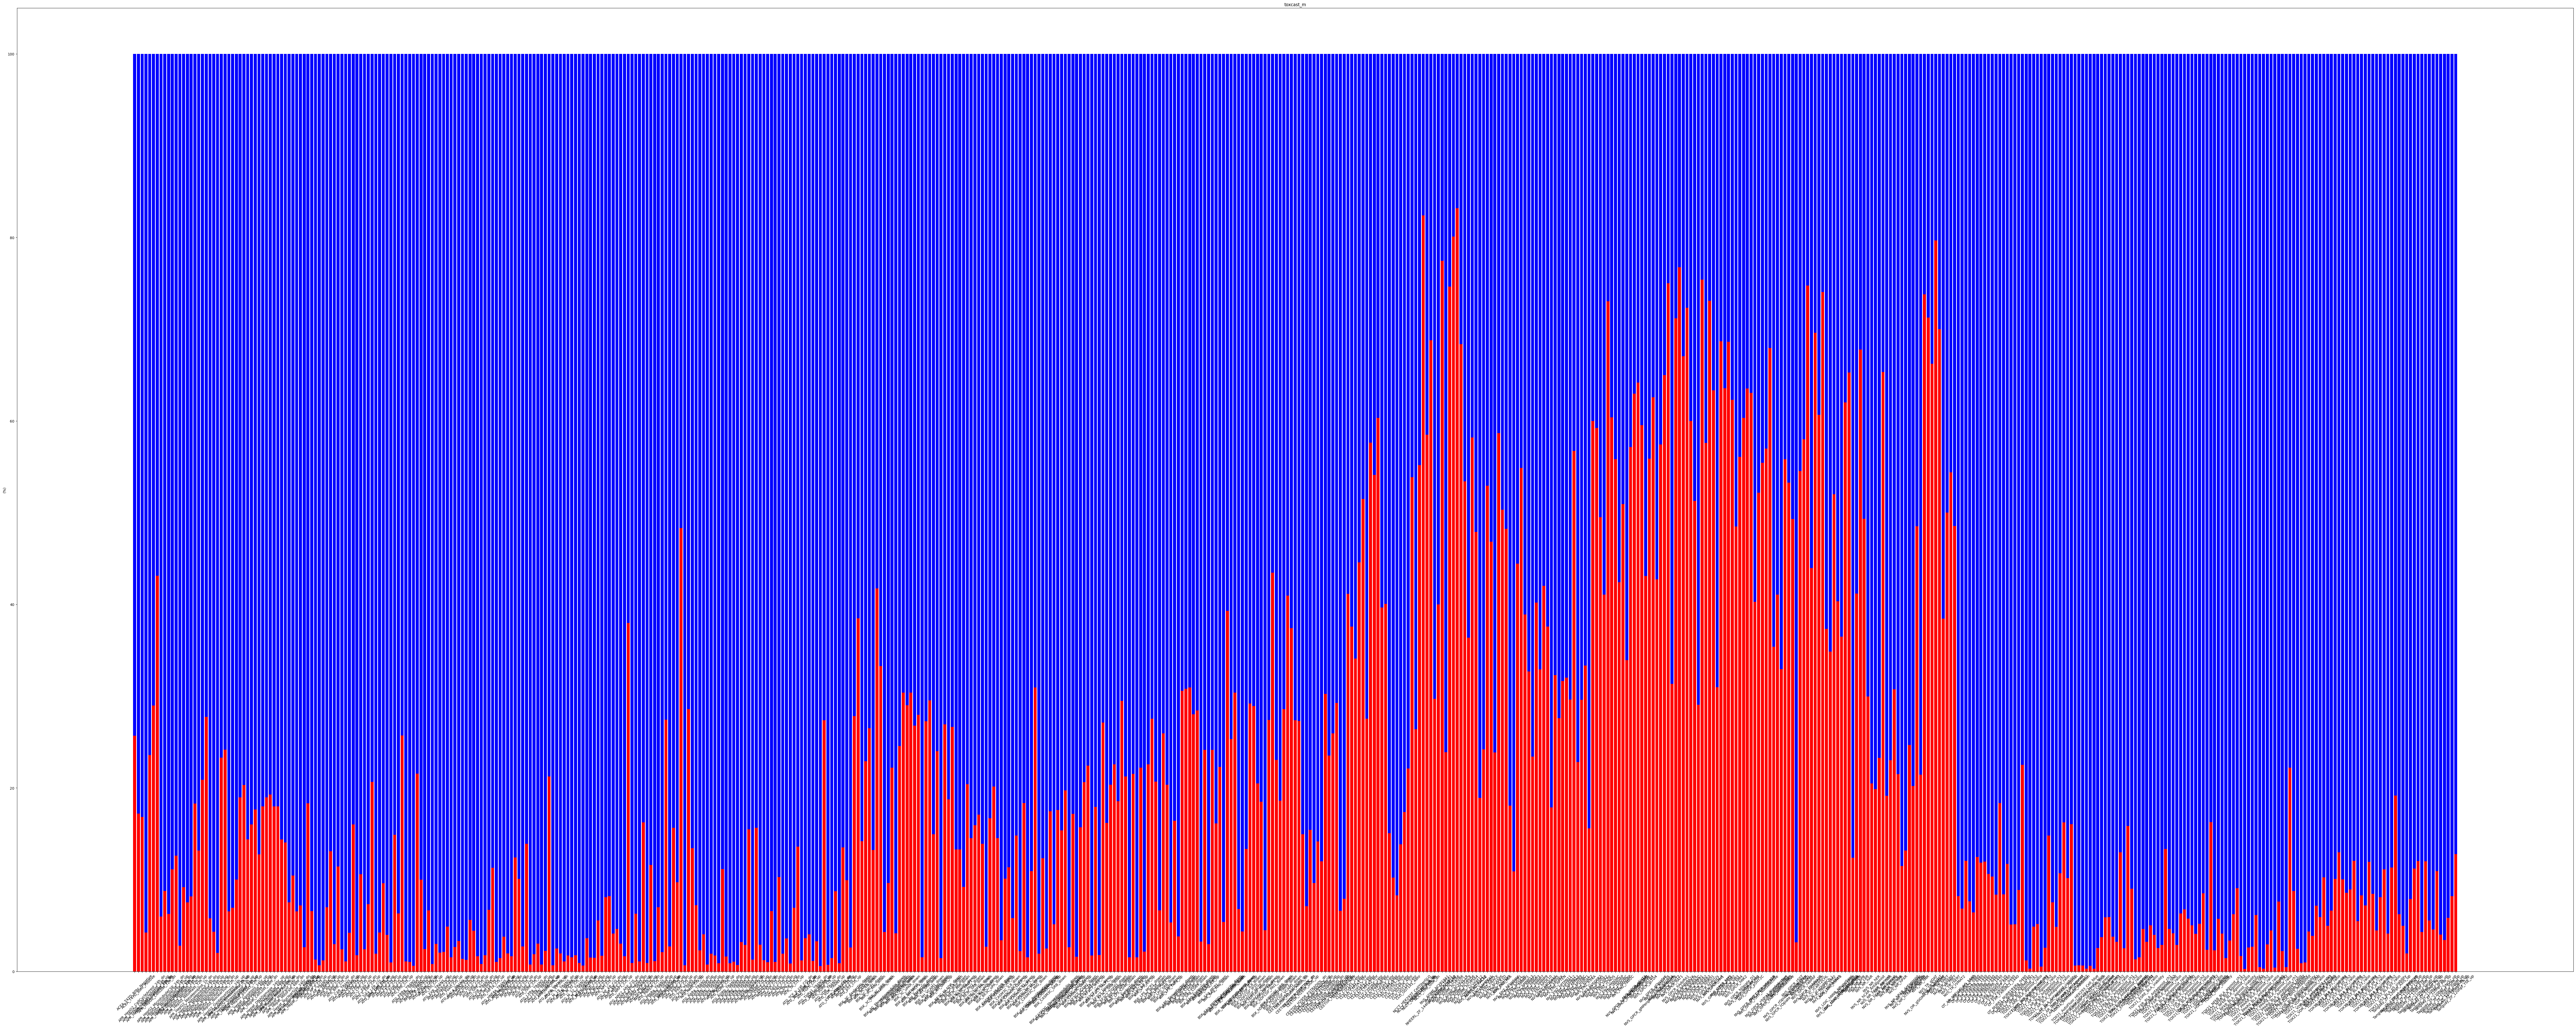

In [219]:
df = ALL_DATA["toxcast_m"]
features = []
prs = []
frs = []
chemicals = []
cnt = 0
for c in df.columns:
    if c == "smiles":
        continue
    pr = df[c].value_counts()[1]*100 / df[c].notnull().sum()
    fr = df[c].value_counts()[0]*100 / df[c].notnull().sum()
    features.append(c)
    prs.append(pr)
    frs.append(fr)
    chemicals.append(df[c].notnull().sum())
    cnt += 1
fig, ax = plt.subplots(figsize=(100, 40))
ax.bar(features, prs, color="red")
ax.bar(features, frs, bottom=prs, color="blue")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
ax.set_ylabel("(%)")
ax.set_title("toxcast_m")
plt.tight_layout()

print("objects:", cnt)
print("max:", max(chemicals))
print("min:", min(chemicals))
print("mean", np.mean(chemicals))

Ames

In [184]:
df = ALL_DATA["ames"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("ames:", pr)
print("chemicals:", df.notnull().sum())

ames: 54.602912888156084
chemicals: 7278


Carcinogens

In [185]:
df = ALL_DATA["carcinogens_lagunin"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("carcinogens:", pr)
print("chemicals:", df.notnull().sum())

carcinogens: 21.428571428571427
chemicals: 280


ClinTox (TDC)

In [186]:
df = ALL_DATA["clintox_t"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("clintox_t:", pr)
print("chemicals:", df.notnull().sum())

clintox_t: 7.577807848443843
chemicals: 1478


DILI

In [187]:
df = ALL_DATA["dili"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("dili:", pr)
print("chemicals:", df.notnull().sum())

dili: 49.68421052631579
chemicals: 475


hERG_central

In [232]:
df = ALL_DATA["herg_central"]["hERG_inhib"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("herg_central:", pr)
print("chemicals:", df.notnull().sum())
print("chemicals (1uM):", ALL_DATA["herg_central"]["hERG_at_1uM"].notnull().sum())
print("chemicals (10uM):", ALL_DATA["herg_central"]["hERG_at_10uM"].notnull().sum())

herg_central: 4.478433851537832
chemicals: 306893
chemicals (1uM): 306893
chemicals (10uM): 306893


hERG_karim

In [189]:
df = ALL_DATA["herg_karim"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("herg_karim:", pr)
print("chemicals:", df.notnull().sum())

herg_karim: 49.96653030866493
chemicals: 13445


hERG

In [191]:
df = ALL_DATA["herg"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("herg", pr)
print("chemicals:", df.notnull().sum())

herg 68.85496183206106
chemicals: 655


skin reaction

In [192]:
df = ALL_DATA["skin_reaction"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("skin_reaction:", pr)
print("chemicals:", df.notnull().sum())

skin_reaction: 67.82178217821782
chemicals: 404


Tox21 (TDC)

objects: 12
max: 7265
min: 5810
mean 6495.5


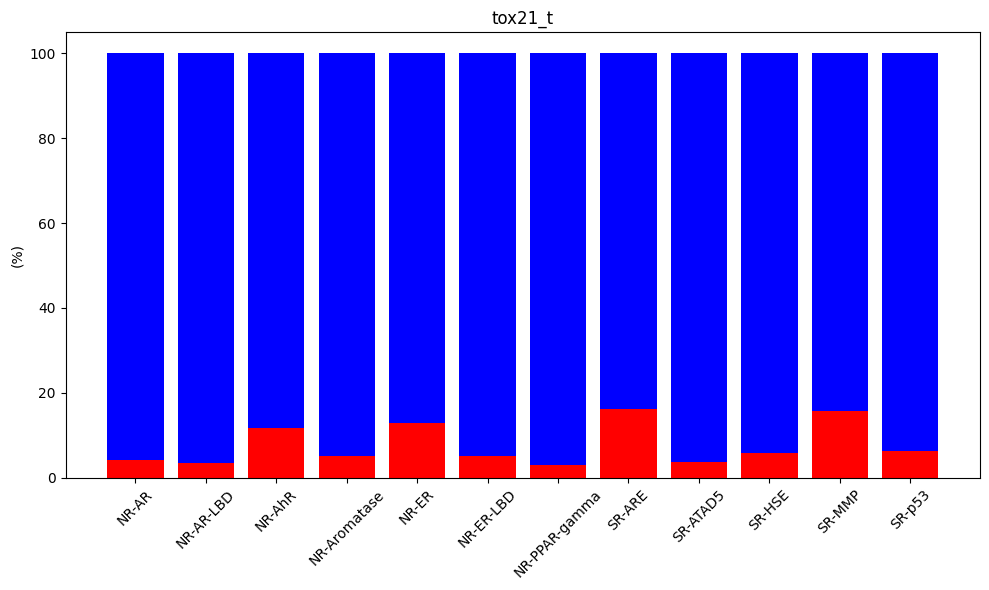

In [221]:
df = ALL_DATA["tox21_t"]
features = []
prs = []
frs = []
chemicals = []
cnt = 0
for c in df.columns:
    if c == "X" or c == "ID":
        continue
    pr = df[c].value_counts()[1]*100 / df[c].notnull().sum()
    fr = df[c].value_counts()[0]*100 / df[c].notnull().sum()
    features.append(c)
    prs.append(pr)
    frs.append(fr)
    chemicals.append(df[c].notnull().sum())
    cnt += 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(features, prs, color="red")
ax.bar(features, frs, bottom=prs, color="blue")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
ax.set_ylabel("(%)")
ax.set_title("tox21_t")
plt.tight_layout()

print("objects:", cnt)
print("max:", max(chemicals))
print("min:", min(chemicals))
print("mean", np.mean(chemicals))

ToxCast (TDC)

objects: 617
max: 7931
min: 50
mean 2485.6726094003243


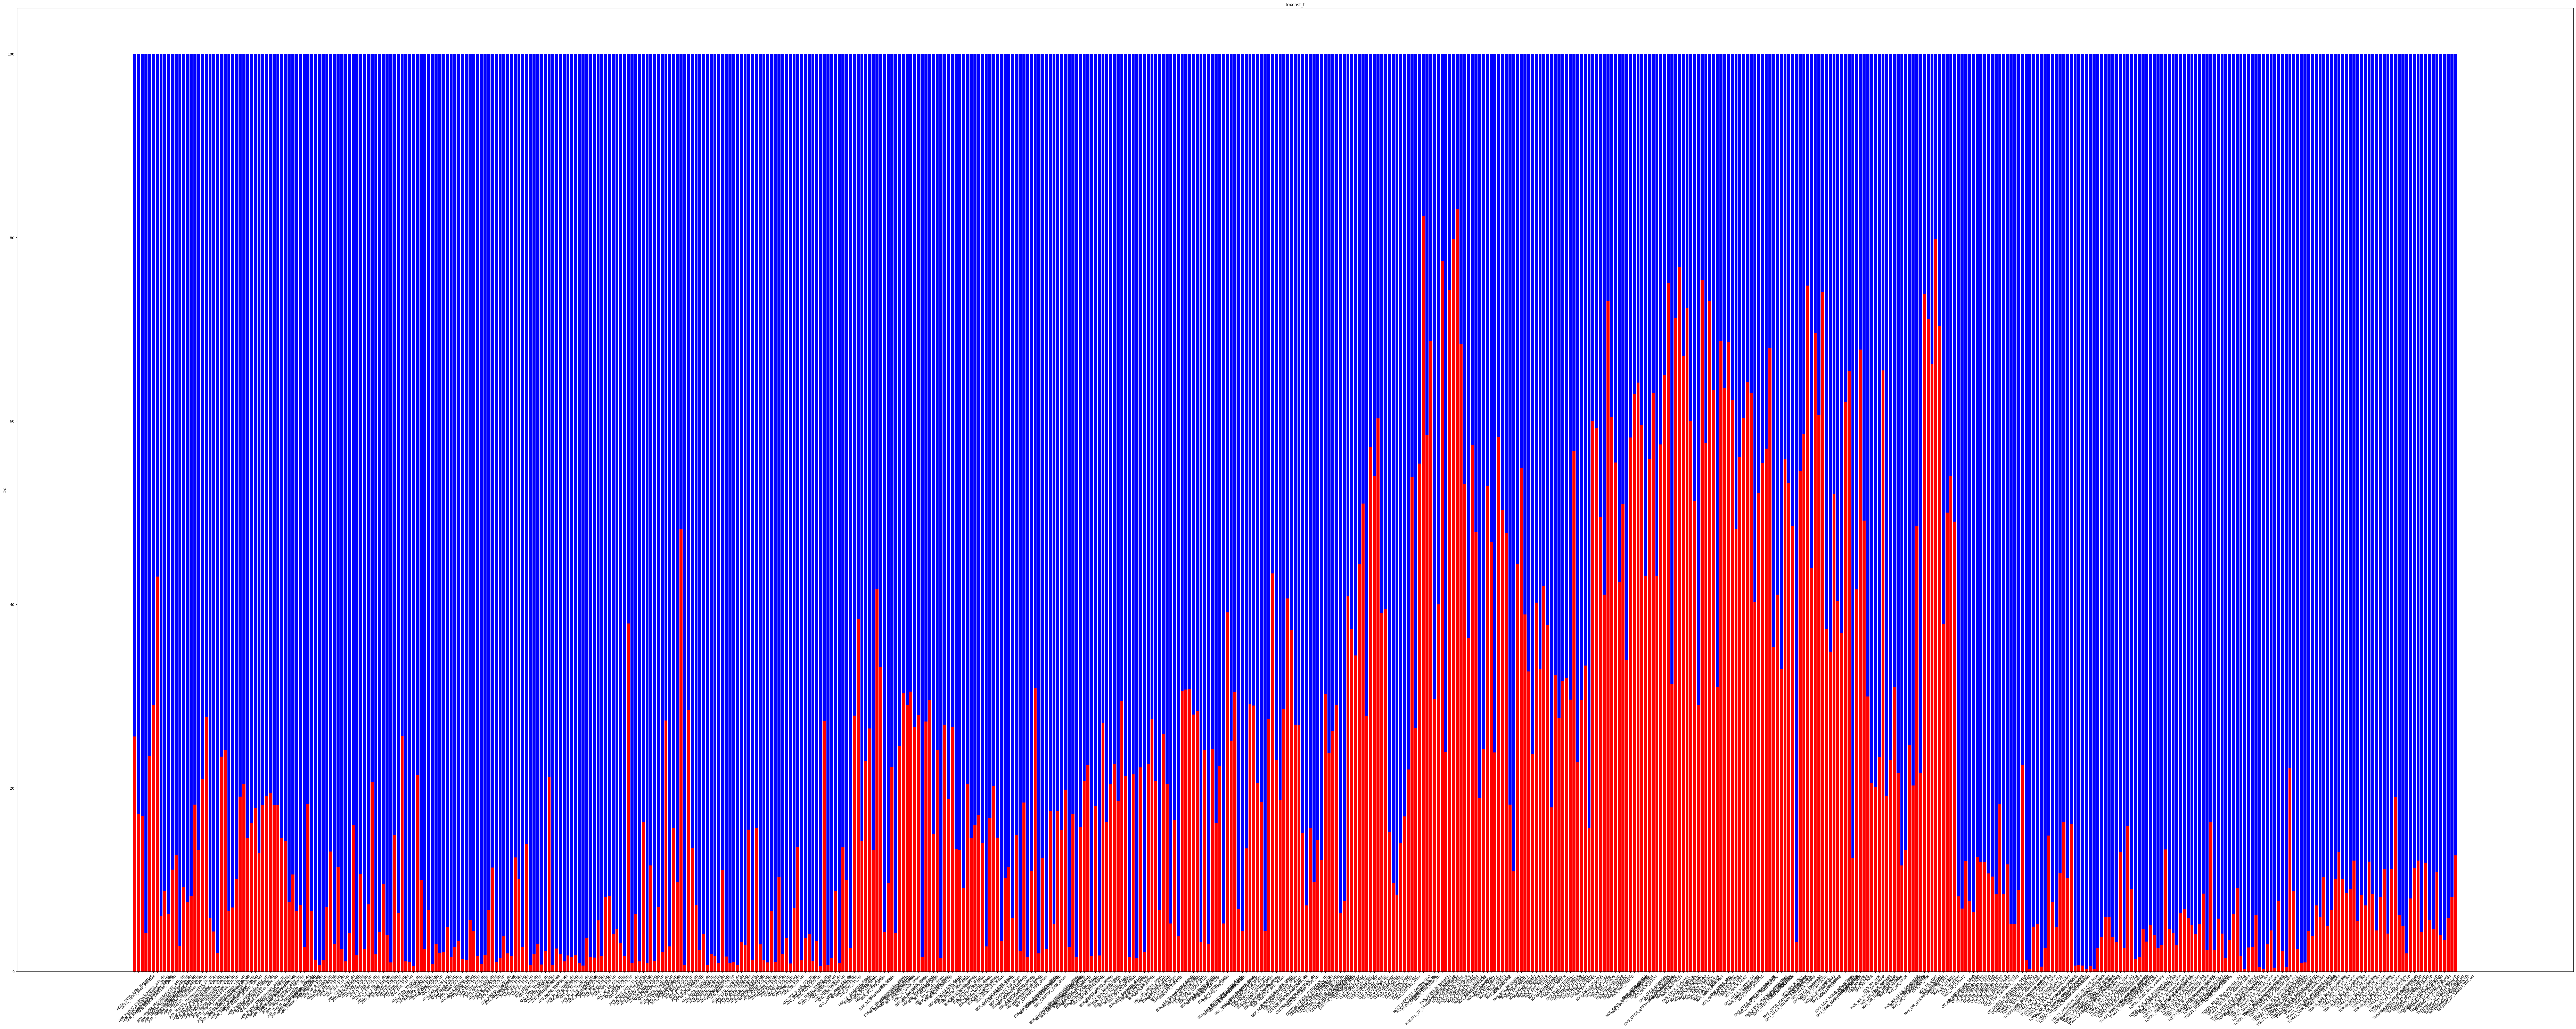

In [222]:
df = ALL_DATA["toxcast_t"]
features = []
prs = []
frs = []
chemicals = []
cnt = 0
for c in df.columns:
    if c == "X" or c == "ID":
        continue
    pr = df[c].value_counts()[1]*100 / df[c].notnull().sum()
    fr = df[c].value_counts()[0]*100 / df[c].notnull().sum()
    features.append(c)
    prs.append(pr)
    frs.append(fr)
    chemicals.append(df[c].notnull().sum())
    cnt += 1
fig, ax = plt.subplots(figsize=(100, 40))
ax.bar(features, prs, color="red")
ax.bar(features, frs, bottom=prs, color="blue")
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45)
ax.set_ylabel("(%)")
ax.set_title("toxcast_t")
plt.tight_layout()

print("objects:", cnt)
print("max:", max(chemicals))
print("min:", min(chemicals))
print("mean", np.mean(chemicals))

CYP1A2 (inhib)

In [196]:
df = ALL_DATA["cyp1a2_veith"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp1a2:", pr)
print("chemicals:", df.notnull().sum())

cyp1a2: 46.33913665633198
chemicals: 12579


CYP2C9 (subst)

In [198]:
df = ALL_DATA["cyp2c9_substrate_carbonmangels"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp2c9_substrate:", pr)
print("chemicals:", df.notnull().sum())

cyp2c9_substrate: 21.076233183856502
chemicals: 669


CYP2C9 (inhib)

In [200]:
df = ALL_DATA["cyp2c9_veith"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp2c9:", pr)
print("chemicals:", df.notnull().sum())

cyp2c9: 33.45186900430036
chemicals: 12092


CYP2C19 (inhib)

In [201]:
df = ALL_DATA["cyp2c19_veith"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp2c19:", pr)
print("chemicals:", df.notnull().sum())

cyp2c19: 45.94551914725622
chemicals: 12665


CYP2D6 (subst)

In [202]:
df = ALL_DATA["cyp2d6_substrate_carbonmangels"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp2d6_substrate:", pr)
print("chemicals:", df.notnull().sum())

cyp2d6_substrate: 28.635682158920538
chemicals: 667


CYP2D6 (inhib)

In [203]:
df = ALL_DATA["cyp2d6_veith"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp2d6:", pr)
print("chemicals:", df.notnull().sum())

cyp2d6: 19.146991622239145
chemicals: 13130


CYP3A4 (subst)

In [204]:
df = ALL_DATA["cyp3a4_substrate_carbonmangels"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp3a4_substrate:", pr)
print("chemicals:", df.notnull().sum())

cyp3a4_substrate: 52.985074626865675
chemicals: 670


CYP3A4 (inhib)

In [205]:
df = ALL_DATA["cyp3a4_veith"]["Y"]
pr = df.value_counts()[1]*100 / df.notnull().sum()
print("cyp3a4:", pr)
print("chemicals:", df.notnull().sum())

cyp3a4: 41.45035691109669
chemicals: 12328


### 回帰

LD50

In [230]:
df = ALL_DATA["ld50_zhu"]["Y"]
print("chemicals", df.notnull().sum())

chemicals 7385


# TEST

In [36]:
ALL_DATA["toxcast_t"].loc[1]

X                                   C[SiH](C)O[Si](C)(C)O[Si](C)(C)O[SiH](C)C
ACEA_T47D_80hr_Negative                                                   NaN
ACEA_T47D_80hr_Positive                                                   NaN
APR_HepG2_CellCycleArrest_24h_dn                                          NaN
APR_HepG2_CellCycleArrest_24h_up                                          NaN
                                                      ...                    
Tanguay_ZF_120hpf_SWIM_up                                                 NaN
Tanguay_ZF_120hpf_TRUN_up                                                 NaN
Tanguay_ZF_120hpf_TR_up                                                   NaN
Tanguay_ZF_120hpf_YSE_up                                                  NaN
ID                                                                     Drug 1
Name: 1, Length: 619, dtype: object

In [110]:
test = ALL_DATA["herg_central"]

In [111]:
display(test.head())

ID                                                  X  hERG_at_1uM  \
0  22416348                             Cc1occc1C(=O)NCc1ccco1     20.17528   
1  26665387        COc1ccc(/C=C2\SC(=S)N(N3CCOCC3)C2=O)c(OC)c1     10.22630   
2    862531            C[C@H](NC(=O)Nc1cccc(C(F)(F)F)c1)C(=O)O      2.04420   
3  26732361  COc1cc(OC)c2ccc(=O)oc2c1C(CC(=O)N1CCOCC1)c1ccc...     21.80250   
4  49735227  COc1cccc(NC(=O)C2C3C=CC4(O3)C2C(=O)N(CCCN2CCCC...      8.33980   

   hERG_at_10uM  hERG_inhib  
0      30.99165           0  
1      13.05888           0  
2       0.06288           0  
3      17.87858           0  
4      19.03128           0

In [88]:
print(test.columns)

Index(['X', 'ACEA_T47D_80hr_Negative', 'ACEA_T47D_80hr_Positive',
       'APR_HepG2_CellCycleArrest_24h_dn', 'APR_HepG2_CellCycleArrest_24h_up',
       'APR_HepG2_CellCycleArrest_72h_dn', 'APR_HepG2_CellLoss_24h_dn',
       'APR_HepG2_CellLoss_72h_dn', 'APR_HepG2_MicrotubuleCSK_24h_dn',
       'APR_HepG2_MicrotubuleCSK_24h_up',
       ...
       'Tanguay_ZF_120hpf_PE_up', 'Tanguay_ZF_120hpf_PFIN_up',
       'Tanguay_ZF_120hpf_PIG_up', 'Tanguay_ZF_120hpf_SNOU_up',
       'Tanguay_ZF_120hpf_SOMI_up', 'Tanguay_ZF_120hpf_SWIM_up',
       'Tanguay_ZF_120hpf_TRUN_up', 'Tanguay_ZF_120hpf_TR_up',
       'Tanguay_ZF_120hpf_YSE_up', 'ID'],
      dtype='object', length=619)


In [89]:
not_feature = []
feature = []
for c in test.columns:
    cnt = 0
    for v in test[c]:
        try:
            if bool(re.search("[A-Za-z]", v)):
                not_feature.append(c)
                break
        except:
            if v == 1 or v == 0:
                cnt += 1
            elif isinstance(v, float):
                feature.append(c)
                break
        if cnt == 5:
            feature.append(c)
            break

In [92]:
print(len(feature))

617


In [91]:
print(not_feature)

['X', 'ID']


In [53]:
bool(re.search("[A-Za-z]", 123))

TypeError: expected string or bytes-like object, got 'int'

In [229]:
from urllib.request import urlretrieve
urlretrieve("https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/pcba_146.csv.gz", "test.csv.gz")

HTTPError: HTTP Error 403: Forbidden